<a href="https://colab.research.google.com/github/nijinpaul/Assignments/blob/main/ASSIGNMENT_DECISION_TREES_(COMPANY_DATA_DATASET)Rev0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement:
### A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
### Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [3]:
# import DATA
df = pd.read_csv('/content/Company_Data.csv')
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [4]:
df.shape

(400, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [6]:
df['Sales'].describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

In [7]:
# using Label Encoding for categorical columns
encoder = preprocessing.LabelEncoder()
df['ShelveLoc']= encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= encoder.fit_transform(df['Urban']) 
df['US']= encoder.fit_transform(df['US']) 


In [8]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,0,42,17,1,1
1,11.22,111,48,16,260,83,1,65,10,1,1
2,10.06,113,35,10,269,80,2,59,12,1,1
3,7.40,117,100,4,466,97,2,55,14,1,1
4,4.15,141,64,3,340,128,0,38,13,1,0


Binning the Sales column to create three distinct categories: low,medium and high sales.

In [9]:
bins = np.linspace(min(df['Sales']), max(df['Sales']), 4)
bins

array([ 0.        ,  5.42333333, 10.84666667, 16.27      ])

In [10]:
label_names = ['Low', 'Medium', 'High']

In [11]:
df['Sales_bin'] = pd.cut(df['Sales'], bins, labels=label_names, include_lowest=True )
df[['Sales','Sales_bin']].head(10)

,Sales,Sales_bin
0,9.50,Medium
1,11.22,High
2,10.06,Medium
3,7.40,Medium
4,4.15,Low
5,10.81,Medium
6,6.63,Medium
7,11.85,High
8,6.54,Medium
9,4.69,Low


In [12]:
# Dropping the sales column as only binned column is necessary
df.drop('Sales',axis=1,inplace=True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,Medium
1,111,48,16,260,83,1,65,10,1,1,High
2,113,35,10,269,80,2,59,12,1,1,Medium
3,117,100,4,466,97,2,55,14,1,1,Medium
4,141,64,3,340,128,0,38,13,1,0,Low


In [13]:
df['Sales_bin'].value_counts()

Medium    247
Low       102
High       51
Name: Sales_bin, dtype: int64

In [14]:
# Label Encoding Sales_bin column
encoder=preprocessing.LabelEncoder()
df['Sales_bin']= encoder.fit_transform(df['Sales_bin']) 

In [15]:
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_bin
0,138,73,11,276,120,0,42,17,1,1,2
1,111,48,16,260,83,1,65,10,1,1,0
2,113,35,10,269,80,2,59,12,1,1,2
3,117,100,4,466,97,2,55,14,1,1,2
4,141,64,3,340,128,0,38,13,1,0,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


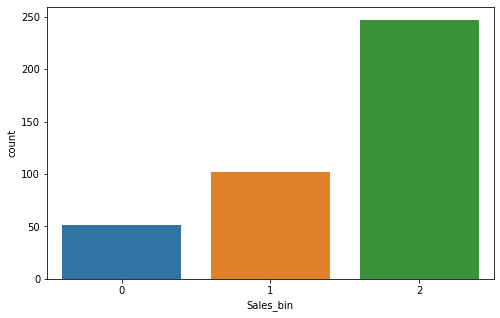

In [16]:
# Checking distribution of output variable
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot('Sales_bin',data=df)

Since the output/dependent variable'Sales_bin' is discrete now ,we will use Classification Tree algorithm.

In [17]:
## Splitting the data into train and test set

In [18]:
# Decision Tree Regression
from sklearn.tree import DecisionTreeClassifier

In [19]:
array=df.values
x = array[:,:-1]
y = array[:,-1]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=0)

## Building decision tree using Gini impurity as criterion

In [22]:
model1 = DecisionTreeClassifier(criterion='gini',random_state=0,)
model1.fit(x_train, y_train)

DecisionTreeClassifier(random_state=0)

The training accuracy being quite higher than test accuracy shows that there is overfitting problem.

In [23]:
pred1 = model1.predict(x_test)

In [24]:
#Accuracy of model

from sklearn.metrics import confusion_matrix
conf_matrix1=confusion_matrix(y_test, pred1)
conf_matrix1

array([[10,  0,  8],
       [ 1, 14, 10],
       [ 8, 18, 51]])

In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54        18
           1       0.44      0.56      0.49        25
           2       0.74      0.66      0.70        77

    accuracy                           0.62       120
   macro avg       0.57      0.59      0.58       120
weighted avg       0.64      0.62      0.63       120



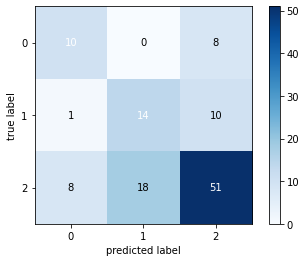

In [59]:
from mlxtend.plotting import plot_confusion_matrix
class_names = ['0=High', '1=Low', '2=Medium']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix1,colorbar=True,show_absolute=True,show_normed=False)
plt.show()

## Building decision tree using entropy criterion

In [38]:
model2=DecisionTreeClassifier(criterion='entropy',random_state=30)
model2.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=30)

In [39]:
pred2 = model2.predict(x_test)

### Plotting a Decision Tree with max_depth=2

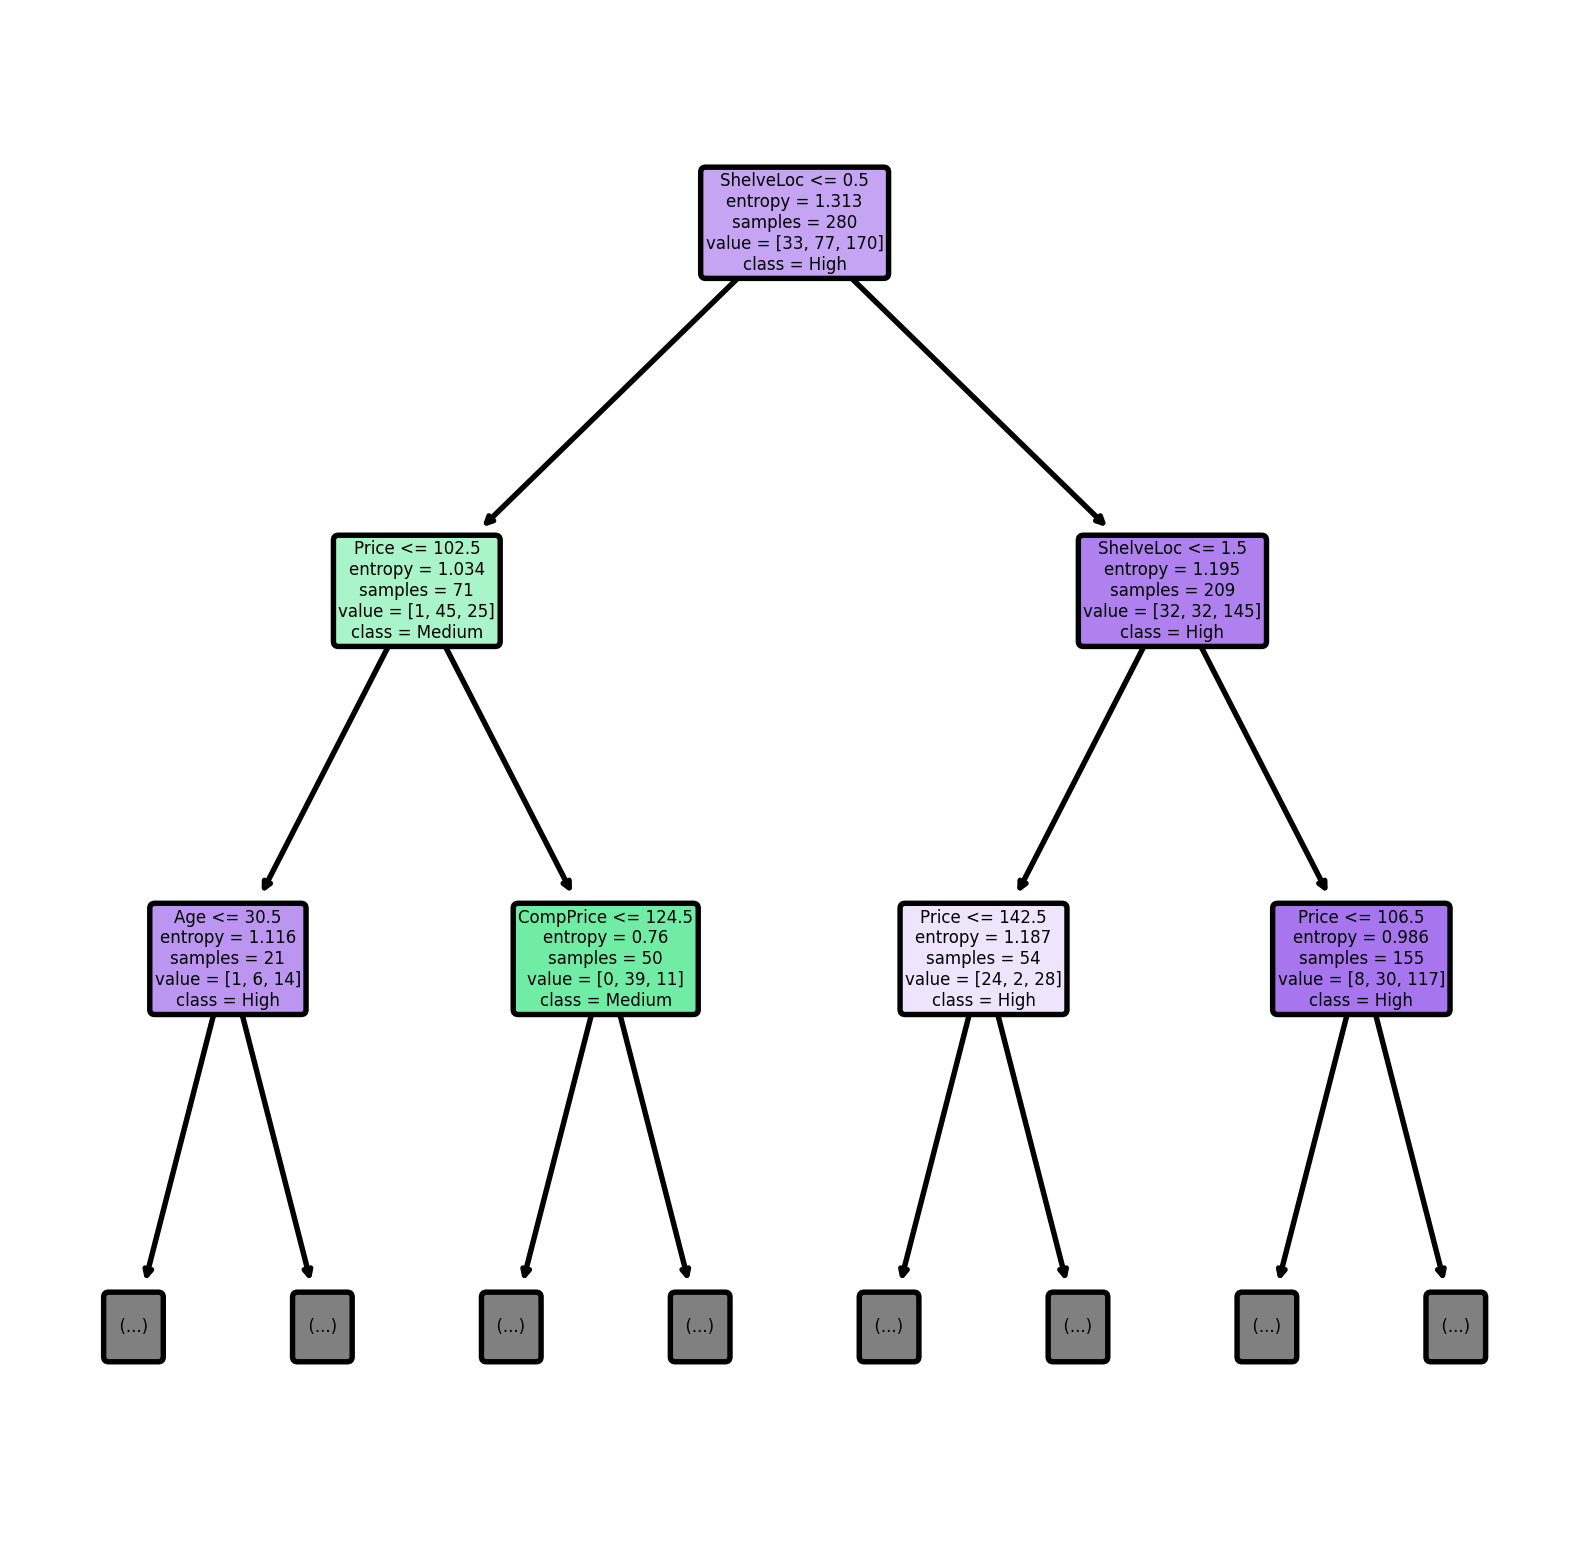

In [41]:

fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price','ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (5,5), dpi=390)
tree.plot_tree(model2,max_depth=2,feature_names = fn, class_names=cn,filled = True,rounded=True);


+ The DT shows that ShelveLoc was chosen as the root node,followed by splitting at Price ,Age and CompPrice.


+ This implies that ShelveLoc is the most important attribute and splitting on this node gives maximum information about output column(Sales).


+ The other important attributes are CompPrice and Age.


In [42]:
#Accuracy of model

conf_matrix2=confusion_matrix(y_test, pred2)
conf_matrix2

array([[12,  0,  6],
       [ 0, 16,  9],
       [ 8, 15, 54]])

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred2))

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.52      0.64      0.57        25
           2       0.78      0.70      0.74        77

    accuracy                           0.68       120
   macro avg       0.63      0.67      0.65       120
weighted avg       0.70      0.68      0.69       120



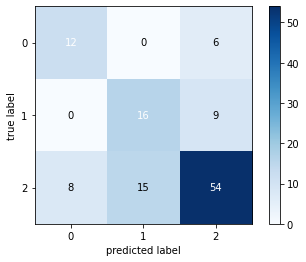

In [45]:
from mlxtend.plotting import plot_confusion_matrix
#class_names = ['0=High', '1=Low', '2=Medium']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix2,colorbar=True,show_absolute=True,show_normed=False)#,class_names=class_names)
plt.show()

## Using GridSearchCV

In [46]:
model3 = DecisionTreeClassifier()

In [47]:
from sklearn.model_selection import GridSearchCV
param_grid={'criterion':['gini','entropy'],
            'min_samples_split':[10,20,30,40]}
            
grid_dt=GridSearchCV(model3,param_grid,scoring='accuracy',refit = True,cv=5)

# fitting the model for grid search 
grid_dt.fit(x_train, y_train) 

# print best parameter after tuning 
print(grid_dt.best_params_) 

{'criterion': 'entropy', 'min_samples_split': 10}


In [48]:
# Prediction and accuracy using test set
grid_pred = grid_dt.predict(x_test) 
   
# print classification report 
print(classification_report(y_test, grid_pred)) 

              precision    recall  f1-score   support

           0       0.60      0.67      0.63        18
           1       0.50      0.68      0.58        25
           2       0.79      0.68      0.73        77

    accuracy                           0.68       120
   macro avg       0.63      0.67      0.65       120
weighted avg       0.70      0.68      0.68       120



In [49]:
conf_matrix3=confusion_matrix(y_test, grid_pred)
conf_matrix3

array([[12,  0,  6],
       [ 0, 17,  8],
       [ 8, 17, 52]])

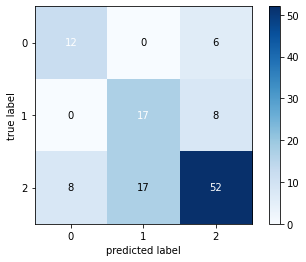

In [51]:
#class_names = ['0=High', '1=Low', '2=Medium']
fig, ax = plot_confusion_matrix(conf_mat=conf_matrix3,colorbar=True,show_absolute=True,show_normed=False)#,class_names=class_names)
plt.show()

## Plotting confusion matrices for the three models in subplots for comparison

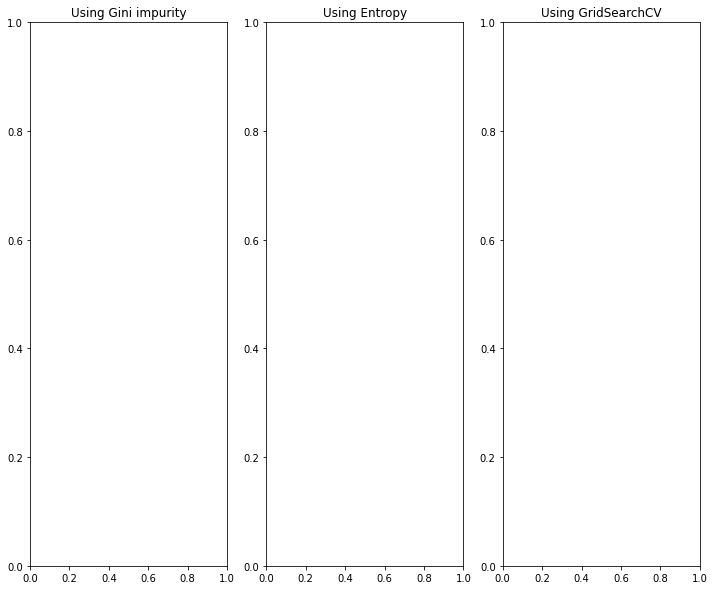

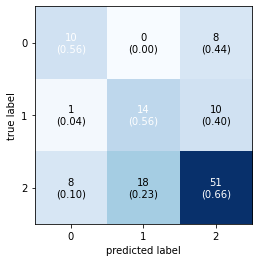

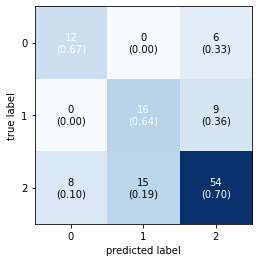

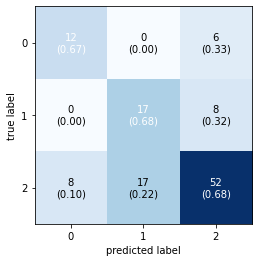

In [61]:

fig, axis= plt.subplots(1,3, figsize=(12,10))

fig, ax= plot_confusion_matrix(conf_mat=conf_matrix1,colorbar=False,show_absolute=True,show_normed=True)
axis[0].set_title('Using Gini impurity')

fig,ax= plot_confusion_matrix(conf_mat=conf_matrix2,colorbar=False,show_absolute=True,show_normed=True)
axis[1].set_title('Using Entropy')

fig,ax=plot_confusion_matrix(conf_mat=conf_matrix3,colorbar=False,show_absolute=True,show_normed=True)
axis[2].set_title('Using GridSearchCV')

plt.subplots_adjust(wspace=0.4)
plt.show()

+ The values within bracket are recall values.


+ For model using gini impurity as criterion- 0.56% of label 0 were correctly predicted, 0.56% of label 1 were correctly predicted and 0.66% of label 3 were correctly predicted.


+ For model using entropy as criterion- 0.67% of label 0 were correctly predicted, 0.64% of label 1 were correctly predicted and 0.70% of label 3 were correctly predicted.


+ For model using GridSearchCV- 0.67% of label 0 were correctly predicted, 0.68% of label 1 were correctly predicted and 0.68% of label 3 were correctly predicted.

In [62]:
d={'Models':['Gini','Entropy','GridSearchCV'],
   'Recall_High(0)':[0.56,0.67,0.67],
   'Recall_Low(1)':[0.56,0.64,0.68],
   'Recall_Medium(2)':[0.66,0.70,0.68],
   'Overall_Accuracy':[0.62,0.68,0.68]}
result_df=pd.DataFrame(d)
result_df

,Models,Recall_High(0),Recall_Low(1),Recall_Medium(2),Overall_Accuracy
0,Gini,0.56,0.56,0.66,0.62
1,Entropy,0.67,0.64,0.70,0.68
2,GridSearchCV,0.67,0.68,0.68,0.68


### From above dataframe we can see that recall values are comparatively better in GridSearchCV and also the overall model accuracy is high when GridSearchCV was used.